# Big Mart Sales Prediction

**Problem Type:**

The problem is a supervised learning task. We aim to predict the sales of products, a quantitative value, based on historical data and various features.

**Business Objective and Desired Outcomes:**

The business objective is to optimize inventory management and maximize revenue by accurately predicting the sales of different products. The desired outcome is a predictive model that provides insights into factors influencing sales and helps in decision-making.

**Constraints and Limitations:**

Constraints include the availability of historical sales data, potential missing values or outliers, and the need to balance model accuracy with computational resources.

**Computational Power, Budget, and Data Availability:**

Computational power: We have access to a standard computing environment, and resource-intensive algorithms should be considered accordingly.

Budget: We aim to keep costs within a reasonable range for model development and deployment.

Data Availability: Historical sales data, product information, and relevant features are available for analysis.

**Evaluation Metrics:**

Key Performance Indicators (KPIs) for optimization: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) will be used to evaluate the model's accuracy in predicting sales.

**Relevance to Target Audience and Prediction Speed:**

The model is relevant to store managers and executives who can use accurate sales predictions for inventory planning. Prediction speed is important for timely decision-making, especially during peak sales periods.

**Data Availability and Necessary Features:**

Data is available for historical sales, product attributes, promotional activities, and store information. Necessary features include product identifiers, prices, promotions, and time-related variables.

**Scope of the Solution:**

The solution involves building a predictive model to estimate product sales. It does not include operational aspects like inventory logistics but aims to provide insights for better decision-making in those areas.

### **Objective:**

The primary objective of using this dataset is to predict or understand the factors influencing sales in a retail store. It can be used for regression analysis and predictive modeling.

## Features in the dataset include:
**Item identifier:** A unique code for each product.

**Item weight:** The weight of the product.

**Item fat content:** Information about the fat content of the product.

**Item visibility:** The percentage of total display area of all products in a store allocated to the particular product.

**Item type:** The category to which the product belongs.

**Item MRP (Maximum Retail Price):** The maximum price at which the product can be sold.

**Outlet identifier:** A unique code for each outlet/store.

**Outlet establishment year:** The year in which the store was established.

**Outlet size:** The size of the store.

**Outlet location type:** The type of location where the store is situated.

**Outlet type:** The type of outlet, such as a grocery store or supermarket.

### Target Variable:

The target variable is usually the sales figure for each product in the store.

In [173]:
#importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [174]:
#Reading the dataset
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [175]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [176]:
#Dataset sample view
train_df.sample(n=5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5107,DRG23,8.88,Low Fat,0.086781,Hard Drinks,152.2682,OUT046,1997,Small,Tier 1,Supermarket Type1,1829.6184
3077,DRE12,4.59,Low Fat,0.070767,Soft Drinks,111.9860,OUT035,2004,Small,Tier 2,Supermarket Type1,792.3020
2570,FDZ31,15.35,Regular,0.113196,Fruits and Vegetables,190.8504,OUT035,2004,Small,Tier 2,Supermarket Type1,3643.2576
2913,FDY44,14.15,Regular,0.024504,Fruits and Vegetables,195.1110,OUT018,2009,Medium,Tier 3,Supermarket Type2,982.0550
6110,FDR52,12.65,Regular,0.076475,Frozen Foods,191.8846,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076


In [177]:
test_df.sample(n=5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3295,DRF49,NaN,Low Fat,0.070734,Soft Drinks,112.0518,OUT027,1985,Medium,Tier 3,Supermarket Type3
1227,FDQ15,20.35,Regular,0.151380,Meat,80.1276,OUT045,2002,NaN,Tier 2,Supermarket Type1
346,FDA03,18.50,Regular,0.045721,Dairy,145.6102,OUT017,2007,NaN,Tier 2,Supermarket Type1
3414,FDL28,10.00,Regular,0.063532,Frozen Foods,228.6668,OUT017,2007,NaN,Tier 2,Supermarket Type1
1772,FDM12,16.70,Regular,0.070059,Baking Goods,190.3214,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [178]:
#Shape of the dataset
train_df.shape

(8523, 12)

In [179]:
test_df.shape

(5681, 11)

In [180]:
#Dataset info
print("TRAIN DATASET INFO:-")
print(train_df.info())
print("TEST DATASET INFO:-")
print(test_df.info())

TRAIN DATASET INFO:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
TEST DATASET INFO:-

In [181]:
# Checking null value percentage
(train_df.isna().sum().sort_values(ascending=False)/train_df.shape[0])*100

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [182]:
(test_df.isna().sum().sort_values(ascending=False)/train_df.shape[0])*100

Outlet_Size                  18.843130
Item_Weight                  11.451367
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [183]:
# Checking for duplicate values
train_df.duplicated().value_counts()

False    8523
dtype: int64

In [184]:
test_df.duplicated().value_counts()

False    5681
dtype: int64

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

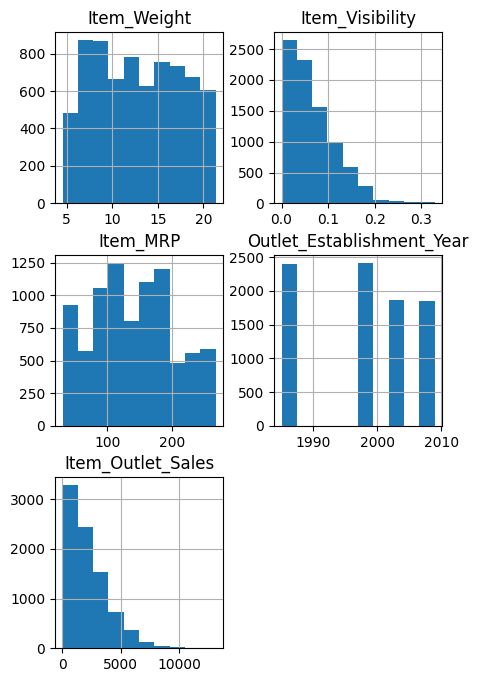

In [185]:
# Distribution of numerical data
train_df.hist(figsize=(5,8))

In [186]:
# Dataset Description
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Pre-processing

Data Preprocessing Steps:-

1.Handle missing values using various imputation techniques.

2.Address outliers using standard deviation or IQR methods.

3.Encode categorical variables using suitable techniques.

4.Transform data through standardization, normalization, or other methods.

5.Handle imbalanced datasets using techniques like oversampling or undersampling.

6.Reduce dimensionality for better computational efficiency.
Apply techniques to transform data for optimal model performance.



Manipulating features

In [187]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [188]:
#Adding one new column called outlet_age
from datetime import datetime
train_df['Outlet_Establishment_Year']=pd.to_datetime(train_df['Outlet_Establishment_Year'],format='%Y')
test_df['Outlet_Establishment_Year']=pd.to_datetime(test_df['Outlet_Establishment_Year'],format='%Y')
current_year=datetime.now().year
train_df['Outlet_age']=current_year-train_df['Outlet_Establishment_Year'].dt.year
test_df['Outlet_age']=current_year-test_df['Outlet_Establishment_Year'].dt.year
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,2778.3834,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002-01-01,NaN,Tier 2,Supermarket Type1,549.2850,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004-01-01,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,1845.5976,15


Null-Value Handling

In [189]:
# Imputing null values for 'Item-Weight' column
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)
test_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)

In [190]:
# Imputing null values for 'Item-Weight' column
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)
test_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)

In [191]:
#After Imputation checking for null values
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_age                   0
dtype: int64

In [192]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_age                   0
dtype: int64

Now we succesfully handled null values

Let's analyze the outliers present over the dataset

<ipython-input-193-ddcea5b994cf>:10: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



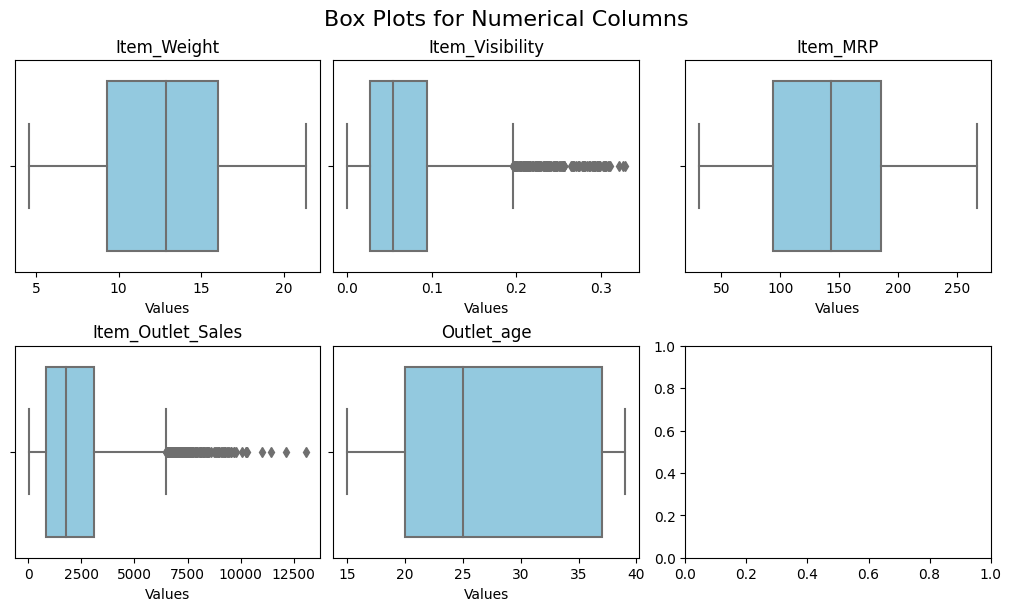

In [193]:
# Plotting boxplot to see the distribution to detect the outliers
#Creating index numercial_col having all number columns
num_cols =train_df.select_dtypes(include='number').columns
import seaborn as sns
# Plotting box plot to check for outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), constrained_layout=True)
fig.suptitle('Box Plots for Numerical Columns', fontsize=16)

# Adjusting subplot parameters
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

# Iterating over each subplot
for ax, column in zip(axes.flatten(), num_cols):
    # Plotting box plot for the current column
    sns.boxplot(x=train_df[column], ax=ax, color='skyblue', orient='h')  # Using orient='h' for horizontal boxplot
    ax.set_title(column, fontsize=12)  # Setting subplot title

    # Optionally, you can add additional customization for each subplot, such as axis labels
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('')  # No need for y-axis label for horizontal boxplot


By seeing the plot we can easily intrepret that some amount of outliers are present in Item_visiblity column and Item_outlet_sales column.

In [194]:
# IQR Method
# Detecting those outliers present over our datset
num_col=['Item_Visibility','Item_Outlet_Sales']
for num in num_col:
  q1=train_df[num].quantile(0.25)
  q3=train_df[num].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-(1.5*IQR)
  upper_bound=q3+(1.5*IQR)
  print('up_bound',train_df[train_df[num]>upper_bound].count())
  print('low_bound',train_df[train_df[num]<lower_bound].count())
  #Dropping those outliers
  train_df=train_df[train_df[num]<upper_bound]
  train_df=train_df[train_df[num]>lower_bound]


up_bound Item_Identifier              144
Item_Weight                  144
Item_Fat_Content             144
Item_Visibility              144
Item_Type                    144
Item_MRP                     144
Outlet_Identifier            144
Outlet_Establishment_Year    144
Outlet_Size                  144
Outlet_Location_Type         144
Outlet_Type                  144
Item_Outlet_Sales            144
Outlet_age                   144
dtype: int64
low_bound Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_age                   0
dtype: int64
up_bound Item_Identifier              186
Item_Weight                  186
Item_Fat_Content             186
Item_Visibility

In [195]:
#for test_data
# IQR Method
# Detecting those outliers present over our datset
num_col=['Item_Visibility']
for num in num_col:
  q1=test_df[num].quantile(0.25)
  q3=test_df[num].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-(1.5*IQR)
  upper_bound=q3+(1.5*IQR)
  print('up_bound',test_df[test_df[num]>upper_bound].count())
  print('low_bound',test_df[test_df[num]<lower_bound].count())
  #Dropping those outliers
  test_df=test_df[test_df[num]<upper_bound]
  test_df=test_df[test_df[num]>lower_bound]

up_bound Item_Identifier              113
Item_Weight                  113
Item_Fat_Content             113
Item_Visibility              113
Item_Type                    113
Item_MRP                     113
Outlet_Identifier            113
Outlet_Establishment_Year    113
Outlet_Size                  113
Outlet_Location_Type         113
Outlet_Type                  113
Outlet_age                   113
dtype: int64
low_bound Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_age                   0
dtype: int64


In [196]:
#Checking the shape of the data after dropping outlier
train_df.shape

(8193, 13)

<ipython-input-197-a6b1b9915ca5>:11: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



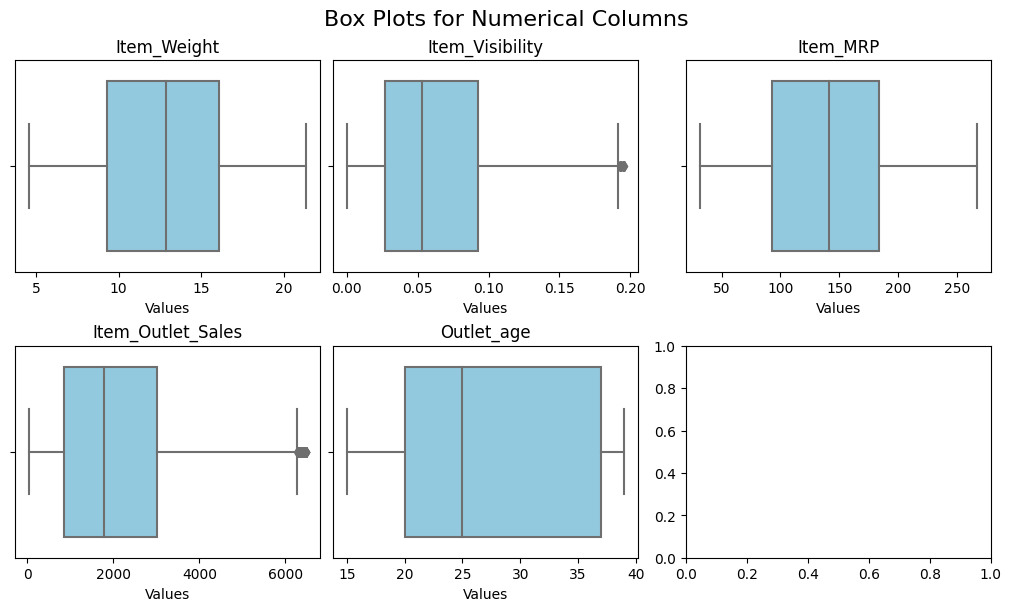

In [197]:
#After removing outlier checking the distribution by using box plot
# Plotting boxplot to see the distribution to detect the outliers
#Creating index numercial_col having all number columns
num_cols =train_df.select_dtypes(include='number').columns
import seaborn as sns
# Plotting box plot to check for outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), constrained_layout=True)
fig.suptitle('Box Plots for Numerical Columns', fontsize=16)

# Adjusting subplot parameters
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

# Iterating over each subplot
for ax, column in zip(axes.flatten(), num_cols):
    # Plotting box plot for the current column
    sns.boxplot(x=train_df[column], ax=ax, color='skyblue', orient='h')  # Using orient='h' for horizontal boxplot
    ax.set_title(column, fontsize=12)  # Setting subplot title

    # Optionally, you can add additional customization for each subplot, such as axis labels
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('')  # No need for y-axis label for horizontal boxplot


After removing outlier Data is looking good , so we are done with outlier analysis.

#### EDA (Exploratory Data Analyis)

In [198]:
train_df.select_dtypes(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_age
0,9.300,0.016047,249.8092,3735.1380,25
1,5.920,0.019278,48.2692,443.4228,15
2,17.500,0.016760,141.6180,2097.2700,25
3,19.200,0.000000,182.0950,732.3800,26
4,8.930,0.000000,53.8614,994.7052,37
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,37
8519,8.380,0.046982,108.1570,549.2850,22
8520,10.600,0.035186,85.1224,1193.1136,20
8521,7.210,0.145221,103.1332,1845.5976,15


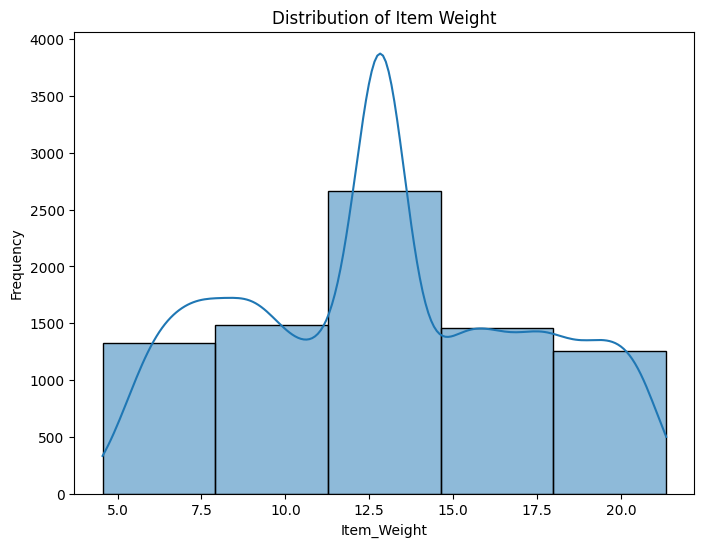

In [149]:
# Distribution of Item_weight
plt.figure(figsize=(8,6))
sns.histplot(train_df['Item_Weight'],bins=5,kde=True)
plt.title('Distribution of Item Weight')
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")
plt.show()

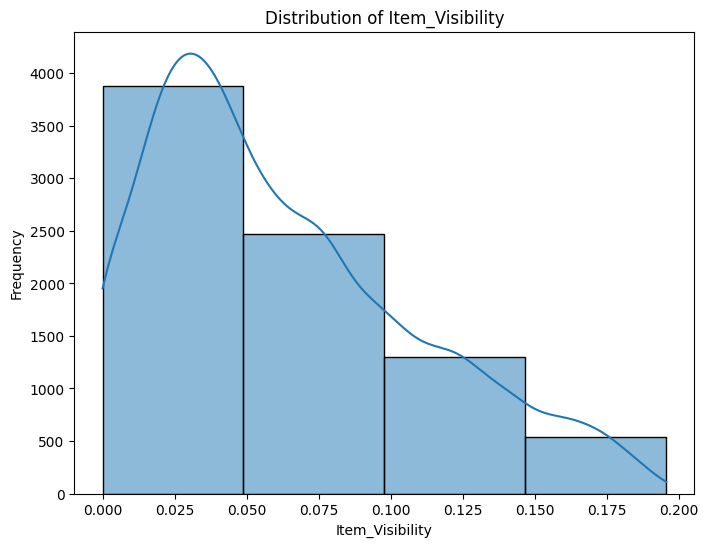

In [28]:
# Distribution of Item_Visibility
plt.figure(figsize=(8,6))
sns.histplot(train_df['Item_Visibility'],bins=4,kde=True)
plt.title('Distribution of Item_Visibility')
plt.xlabel("Item_Visibility")
plt.ylabel("Frequency")
plt.show()

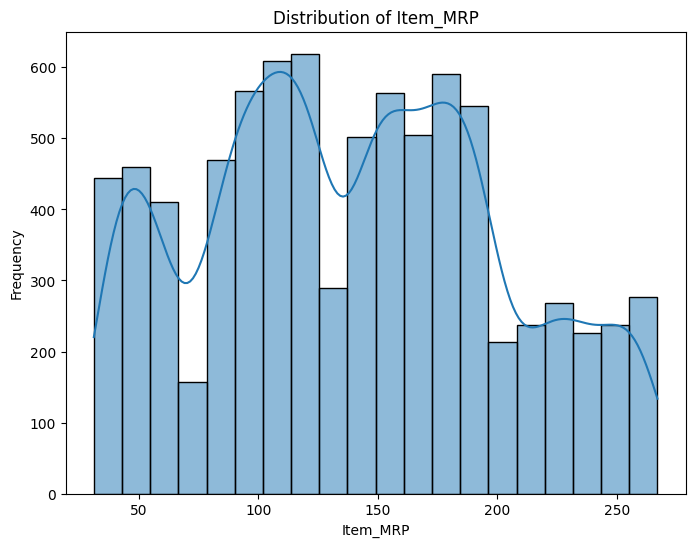

In [29]:
# Distribution of Item_MRP
plt.figure(figsize=(8,6))
sns.histplot(train_df['Item_MRP'],bins=20,kde=True)
plt.title('Distribution of Item_MRP')
plt.xlabel("Item_MRP")
plt.ylabel("Frequency")
plt.show()

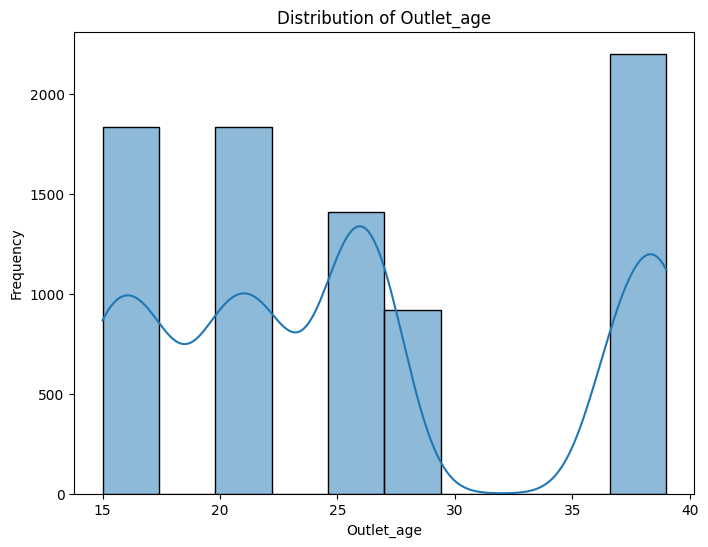

In [30]:
# Distribution of Outlet_age
plt.figure(figsize=(8,6))
sns.histplot(train_df['Outlet_age'],bins=10,kde=True)
plt.title('Distribution of Outlet_age')
plt.xlabel("Outlet_age")
plt.ylabel("Frequency")
plt.show()


Lets Check for Data Imbalanceness for Target variable

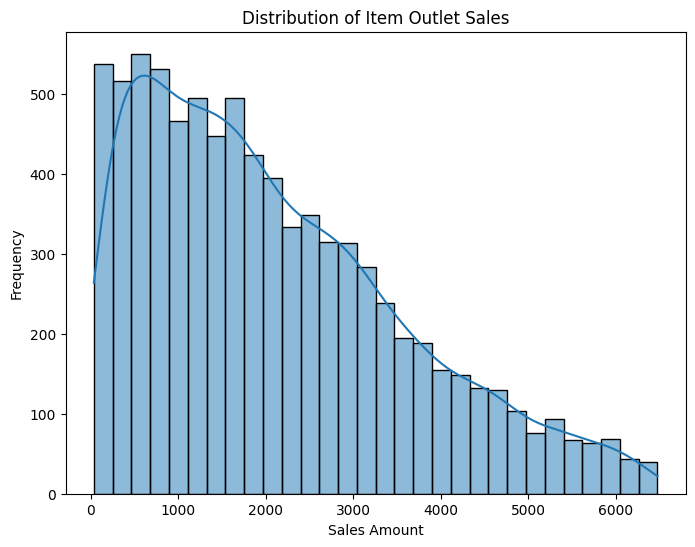

In [31]:
#Checking distribution of target variable`

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(train_df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


In [32]:
skewness = train_df['Item_Outlet_Sales'].skew()
print(f"Skewness of Item Outlet Sales: {skewness:.2f}")


Skewness of Item Outlet Sales: 0.77


It's indicating that feature has moderate positive skewness

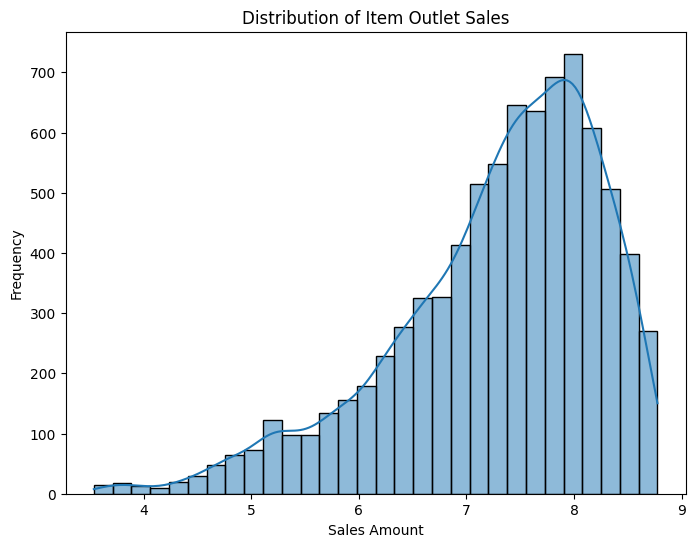

In [33]:
#using log for skewness
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(train_df['Item_Outlet_Sales']), bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

Outlet's Age Analysis

In [34]:
!pip install plotly

In [35]:
import plotly.express as px

In [36]:
#Lets Analyze outlet's age
train_df['Outlet_age'].value_counts().sort_values(ascending=False)

39    1283
15     925
22     920
27     920
25     919
37     917
20     914
17     907
26     488
Name: Outlet_age, dtype: int64

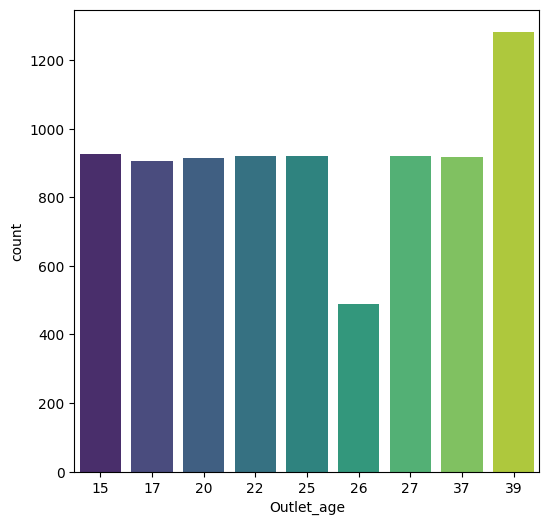

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_age',data=train_df,color='green',palette='viridis')
plt.show()

From the aove countplot we can say that maximum no of outlets are 39 years old.

Outlet Establishment Year

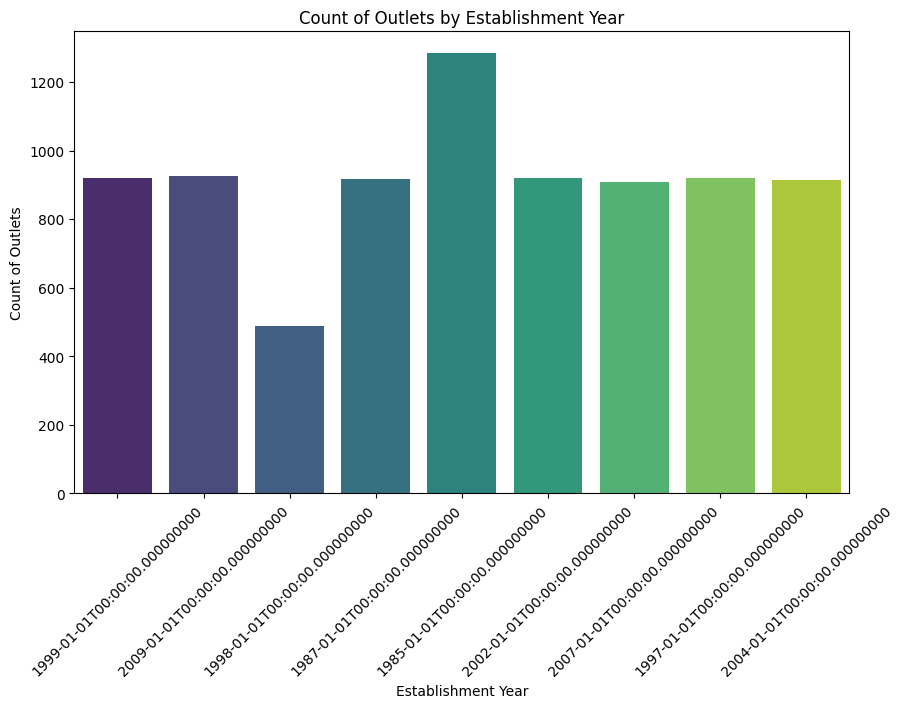

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Outlet_Establishment_Year', palette='viridis')
plt.title('Count of Outlets by Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Count of Outlets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Above figure represents that most of the outlets established on 1985.

#### Item Fat Content Distribution

In [39]:
import plotly.express as px
import pandas as pd
# Count the occurrences of each unique value in 'Item_Fat_Content'
fat_content_counts = train_df['Item_Fat_Content'].value_counts().reset_index()

# Create a pie chart using Plotly
fig = px.pie(fat_content_counts,
             names='index',  # 'index' represents the unique values in 'Item_Fat_Content'
             values='Item_Fat_Content',  # Count of occurrences
             title='Distribution of Item Fat Content',
             labels={'Item_Fat_Content': 'Count'},
             )

# Show the plot
fig.show()



Majority of the Item Fat Content are Low Fat.

Item Type Distribution

In [40]:
import plotly.express as px
import pandas as pd
# Count the occurrences of each unique value in 'Item_Type'
Item_Type_counts = train_df['Item_Type'].value_counts().reset_index()

# Create a count plot using Plotly
fig = px.bar(Item_Type_counts,
             x='index',  # 'index' represents the unique values in 'Item_Type'
             y='Item_Type',  # Count of occurrences
             title='Count Plot of Item_Type',
             labels={'Item_Type': 'Count'},

             )

# Show the plot
fig.show()


Most of the Items are Fruits and Vegetables followed by Snack Foods.

Outlet Size Distribution

In [41]:
import plotly.express as px
import pandas as pd
# Count the occurrences of each unique value in 'Outlet_Size'
Item_Type_counts = train_df['Outlet_Size'].value_counts().reset_index()

# Create a count plot using Plotly
fig = px.bar(Item_Type_counts,
             x='index',  # 'index' represents the unique values in 'Outlet_Size'
             y='Outlet_Size',  # Count of occurrences
             title='Count Plot of Outlet_Size',
             labels={'Item_Type': 'Count'},

             )

# Show the plot
fig.show()


Most of the outlets are medium in size.

Outlet_Location_Type Distribution

In [42]:
# Count the occurrences of each unique value in 'Outlet_Location_Type'
Outlet_Location_Type_counts=train_df["Outlet_Location_Type"].value_counts().reset_index()
fig=px.bar(
    Outlet_Location_Type_counts,
    x='index',
    y='Outlet_Location_Type',
    title='Count Plot of Outlet_Location_Type',
    labels={'Outlet_Location_Type': 'Count'},
)
fig.show()

Most of the outlets are based on Tier 3 locations.

Outlet_Type Distribution

In [43]:
# Count the occurrences of each unique value in 'Outlet_Location_Type'
Outlet_Type_counts=train_df["Outlet_Type"].value_counts().reset_index()
fig=px.bar(
    Outlet_Type_counts,
    x='index',
    y='Outlet_Type',
    title='Count Plot of Outlet_Type',
    labels={'Outlet_Type': 'Count'},
)
fig.show()

Supermarket Type1 outlet types are more in count.

Sales Generated by Output_Location_Type

In [44]:
fig=px.bar(
    train_df,
    x='Outlet_Location_Type',
    y='Item_Outlet_Sales',
    title='Outlet_Location_Type vs Item_Outlet_Sales',
    color='Outlet_Location_Type',

)
fig.show()

According to the figure specifically Tier-3 location type more sale has been generated as compared to other location_type.

Sales Generated by Output_Type

In [45]:

fig=px.bar(
    train_df,
    x='Outlet_Type',
    y='Item_Outlet_Sales',
    title='Outlet_Type vs Item_Outlet_Sales',
    color='Outlet_Type',

)
fig.show()

From the figure we can say that Supermarket Type 1 is contributing more towards sales followed by Supermarket type 3 and Supermarket Type2.

Time-Series Analysis(Sales over year)

In [46]:
import plotly.express as px

# Convert 'Outlet_Establishment_Year' to datetime format if it's not already
train_df['Outlet_Establishment_Year'] = pd.to_datetime(train_df['Outlet_Establishment_Year'], format='%Y')

# Extract the year from the datetime column
train_df['Year'] = train_df['Outlet_Establishment_Year'].dt.year

# Group by year and sum the sales for each year
sales_by_year = train_df.groupby('Year')['Item_Outlet_Sales'].sum().reset_index()

# Create a line plot using Plotly Express
fig = px.line(sales_by_year, x='Year', y='Item_Outlet_Sales', markers=True, title='Sales Trend Over Years')
#fig.update_layout(xaxis_title='Year', yaxis_title='Total Sales', showgrid=True)
fig.show()


As per to the above figure we can see that in 1985 sales was high and in the year of 1998 sales was too low.

Price Impact Analysis (Item_MRP vs Item_Outlet_Sales)

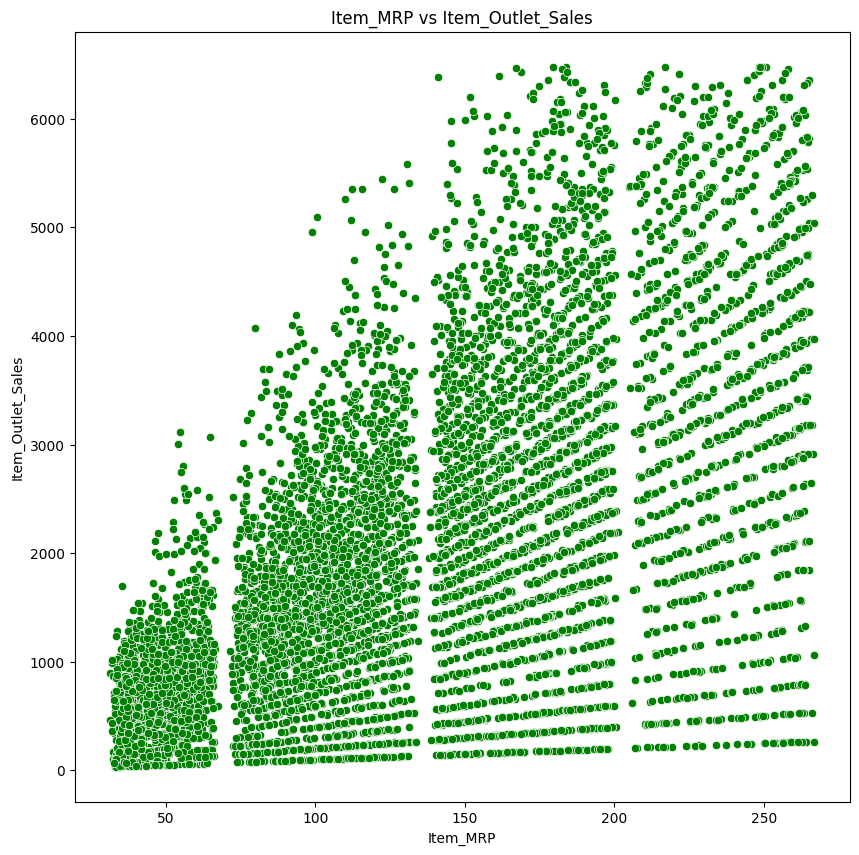

In [47]:
plt.figure(figsize = (10,10))
# Using Seaborn Scatterplot for visualization
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales', data = train_df,color='green')
plt.title("Item_MRP vs Item_Outlet_Sales")
#show the plot
plt.show()

In [48]:
print("Correlation coefficients between Item_MRP and Item_Outlet_Sales",train_df['Item_MRP'].corr(train_df['Item_Outlet_Sales']))

Correlation coefficients between Item_MRP and Item_Outlet_Sales 0.5643608056634044


So we can say that Item_MRP and Item_Outlet_Sales has good amount of positive correlation.

Item_Weight vs Item_Outlet_Sales

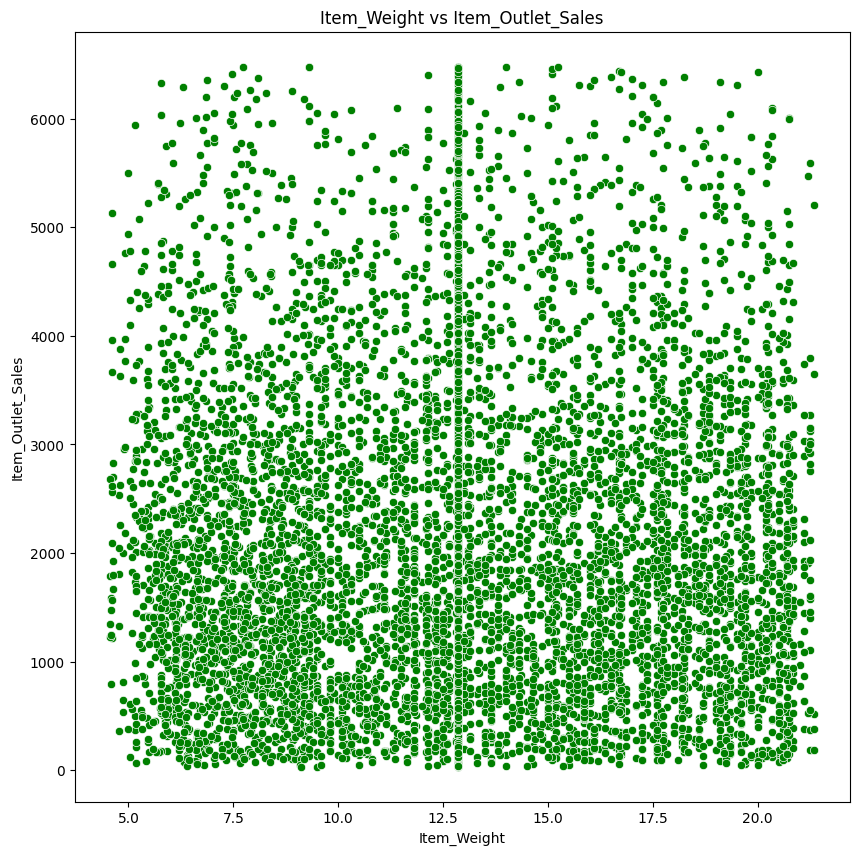

In [49]:
plt.figure(figsize = (10,10))
# Using Seaborn Scatterplot for visualization
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales', data = train_df,color='green')
plt.title("Item_Weight vs Item_Outlet_Sales")
#show the plot
plt.show()

In [50]:
print("Correlation coefficients between Item_Weight and Item_Outlet_Sales",train_df['Item_Weight'].corr(train_df['Item_Outlet_Sales']))

Correlation coefficients between Item_Weight and Item_Outlet_Sales 0.010881255529388584


Item_Weight and Item_Outlet_Sales has weak positive correlation.

Item_Visibility vs Item_Outlet_Sales

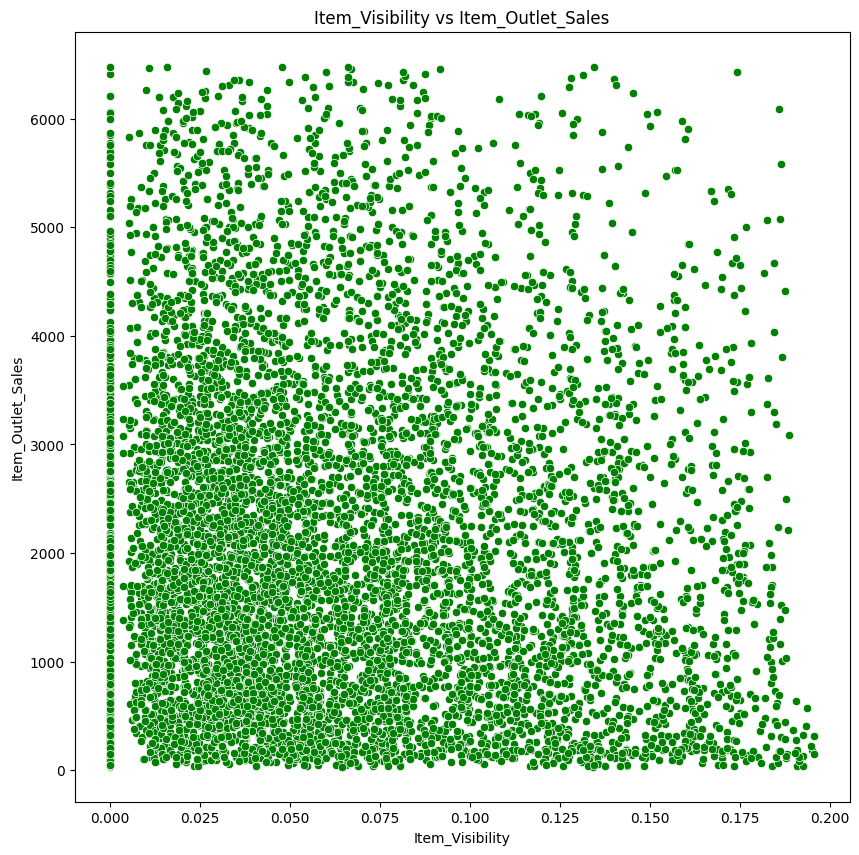

In [51]:
plt.figure(figsize = (10,10))
# Using Seaborn Scatterplot for visualization
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales', data = train_df,color='green')
plt.title("Item_Visibility vs Item_Outlet_Sales")
#show the plot
plt.show()

In [187]:
print("Correlation coefficients between Item_Weight and Item_Outlet_Sales",train_df['Item_Visibility'].corr(train_df['Item_Outlet_Sales']))

Correlation coefficients between Item_Weight and Item_Outlet_Sales -0.07190721235914112


Item_Weight and Item_Outlet_Sales has weak negative correlation.

Outlet_Size and Output_location_type based sales

In [52]:
import plotly.express as px

# Assuming your DataFrame is named 'df'

# Create a bar plot to compare sales across different Outlet Sizes and Location Types
fig = px.bar(train_df, x='Outlet_Size', y='Item_Outlet_Sales', color='Outlet_Location_Type',
             title='Outlet Size and Location Analysis',
             labels={'Item_Outlet_Sales': 'Total Sales', 'Outlet_Size': 'Outlet Size'},
             )

# Customize the layout
fig.update_layout(xaxis_title='Outlet Size', yaxis_title='Total Sales', showlegend=True, barmode='group')

# Show the plot
fig.show()


From the above figure we can say that medium sized outlets located in Tier 3 cities generating more sales as compared to other categories.

Multi-Variate Analysis

Correlation heatmap

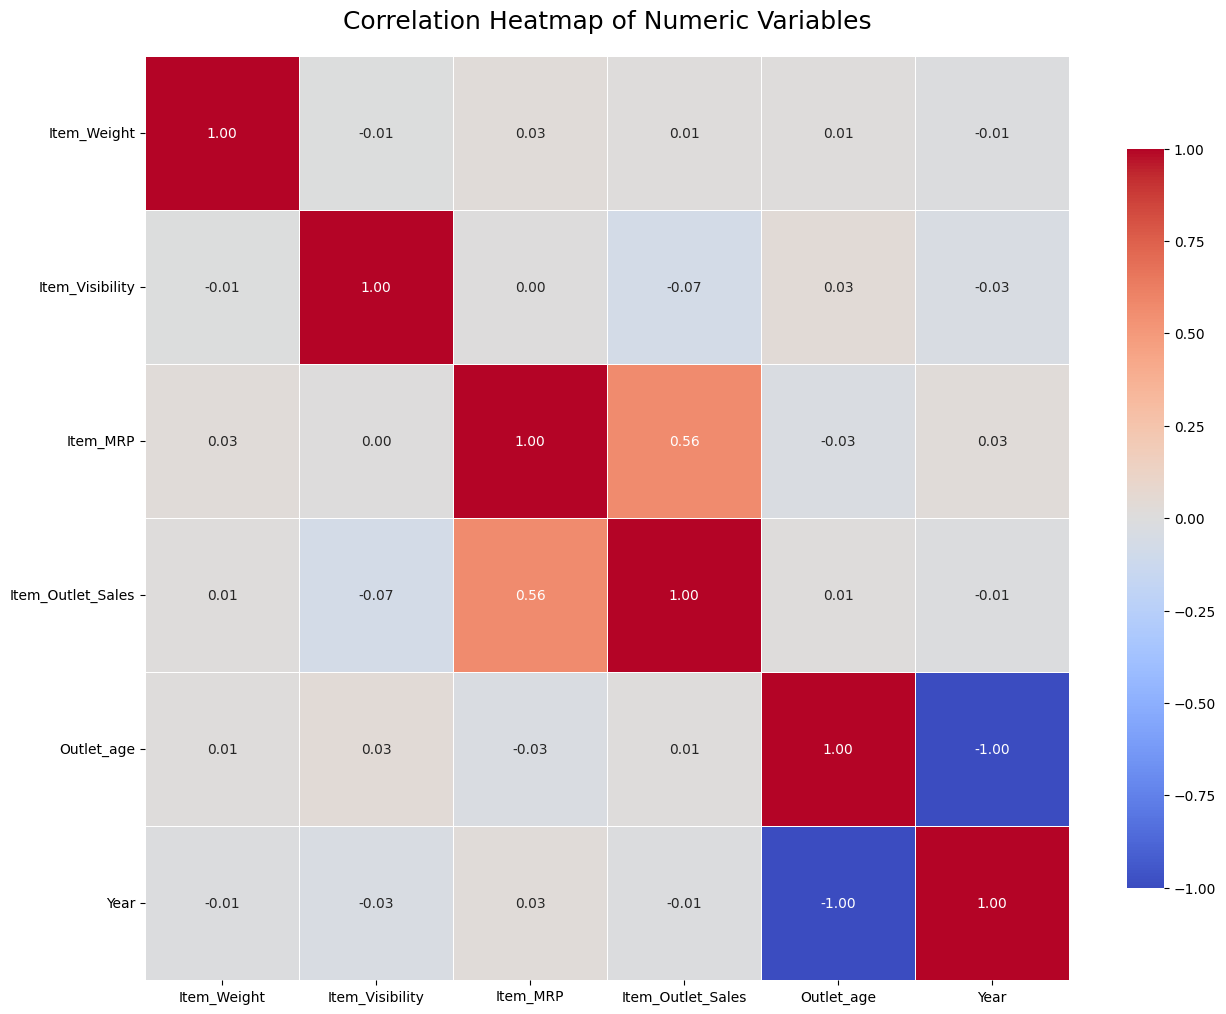

In [53]:
# Correlation Heatmap visualization code
# Drop non-numeric columns for correlation matrix
numeric_columns = train_df.select_dtypes(include=[np.number])

# Create correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using seaborn
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,  # Display a square-shaped heatmap
    fmt=".2f",    # Format the annotation to two decimal places
    annot_kws={"size": 10},  # Adjust the font size of annotations
    cbar_kws={"shrink": 0.8},  # Adjust the color bar size
)

heatmap.set_title('Correlation Heatmap of Numeric Variables', pad=20, size=18)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()


### Feature Selection

In [200]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age'],
      dtype='object')

In [201]:
#based on general requirements we are dropping two columns as those are not required for model building
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
train_df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
test_df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

Category encoding before model building

In [202]:
#creating copy of the origina dataset
train_df1=train_df.copy()

In [203]:
pip install category_encoders

In [204]:
#Using LabelEncoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder=LabelEncoder()


In [205]:
cat_cols =train_df.select_dtypes(include='object').columns
for cols in cat_cols:
  train_df1[cols]=encoder.fit_transform(train_df1[cols])
print(train_df1)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \


Model Building

In [157]:
#Dividing the data
x=train_df1.drop(columns=['Item_Outlet_Sales'],axis=1)
y =np.log1p(train_df1["Item_Outlet_Sales"])

In [206]:
#Data standardization
#Using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std_data=scaler.fit_transform(x)
x=std_data

In [207]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score,KFold

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [208]:
# For Model Building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

In [209]:
models = [LinearRegression,DecisionTreeRegressor, RandomForestRegressor]
Lnr = LinearRegression()
SVR_rbf = SVR(kernel = 'linear')
DT = DecisionTreeRegressor()
RDF = RandomForestRegressor()
models = [Lnr,SVR_rbf,DT,RDF]

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []


for model in models:
    regressor = model.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [210]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression","Decision Tree Regressor", "Random Forest Regressor","SVR_rbf"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,0.520900,0.427623,0.653929,0.548185
Decision Tree Regressor,0.515239,0.430144,0.655854,0.545522
Random Forest Regressor,0.577382,0.569580,0.754705,0.398199
SVR_rbf,0.421098,0.289242,0.537812,0.694396


Using Cross_validation

In [211]:
from sklearn.model_selection import cross_val_score

# Assuming you have imported LinearRegression, DecisionTreeRegressor, RandomForestRegressor, and SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(kernel='linear')]

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    # Perform cross-validation with 5 folds
    cross_val_mae = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    cross_val_mse = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cross_val_rmse = cross_val_score(model, x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    cross_val_r2 = cross_val_score(model, x_train, y_train, scoring='r2', cv=5)

    # Append the mean scores to the lists
    mae_scores.append(-cross_val_mae.mean())
    mse_scores.append(-cross_val_mse.mean())
    rmse_scores.append(-cross_val_rmse.mean())
    r2_scores.append(cross_val_r2.mean())

In [213]:
# Create a DataFrame to display the results
regression_metrics_df2 = pd.DataFrame({
    "Model": ["Linear Regression","Decision Tree Regressor", "Random Forest Regressor","SVR_rbf"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df2.set_index('Model', inplace=True)
regression_metrics_df2

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,0.516167,0.427333,0.653649,0.550947
Decision Tree Regressor,0.572805,0.554222,0.744741,0.416758
Random Forest Regressor,0.429082,0.304768,0.552023,0.679663
SVR_rbf,0.513707,0.433061,0.658021,0.544921


Summary of the results:-

After applying various models and utilizing cross-validation techniques, our analysis reveals that the Support Vector Regression (SVR) model outperformed other models, achieving the highest accuracy with an impressive score of nearly 69%. This indicates the robustness and effectiveness of the SVR model in capturing the underlying patterns within the dataset. The careful selection of features and the utilization of SVR's capabilities have contributed to the model's success in predicting the target variable. This finding underscores the potential of SVR as a valuable tool for our specific dataset and problem domain.